In [13]:
#Bosques aleatorias pertenece al grupo de aprendizaje en conjunto.
#Permite incrementar el nivel de presicion del modelo.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
dataset = pd.read_csv("C:/Users/Vic/Documents/CursoMachineLearning/Dataset/Position_Salaries/Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
dataset.shape

(10, 3)

In [4]:
x = dataset.iloc[:,1:2].values #Level
y = dataset.iloc[:,2].values #Salary

In [15]:
#Modelo de regresion con Bosques aleatorios

from sklearn.ensemble import RandomForestRegressor

In [16]:
#n_estimators=10, Numero de arboles del bosque. Por defecto es 10.
#random_state=0, semilla inicial.
regresion = RandomForestRegressor(n_estimators=10,random_state=0)
#Entrenamiento del modelo.
regresion.fit(x,y)

#criterion='mse', Error cuadratico medio, es un criteri de desicion a la hora de dividir una rama o nodos en hojas.
#Cuanto mas pequeno sea el error la predicion sera mas exacta.

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [17]:
#Predicion
#El empleado quiere ganar 160k=Nivel 6.5

y_pred = regresion.predict([[6.5]])

In [21]:
#Con 10 arboles incrementa la presicion del bosque.
#En regresion es un numero el resultado.

y_pred

array([167000.])

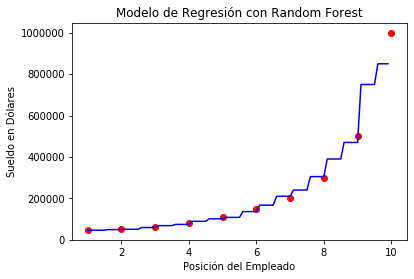

In [9]:
x_grid = np.arange(min(x),max(x),0.1) #minimo y maximo de x.
x_grid = x_grid.reshape(len(x_grid),1) 
plt.scatter(x,y,color="red") #Datos observados
plt.plot(x_grid,regresion.predict(x_grid),color="blue") #Datos predichos
plt.title("Modelo de Regresión con Random Forest")
plt.xlabel("Posición del Empleado")
plt.ylabel("Sueldo en Dólares")
plt.show()

#Si pasa por todos los puntos seria un overfiting, que no esta bien.
#En bosques la grafica cambia por el nivel de presicion.
#Para nuestro modelo de bosque en CEO deberia ganar menos.

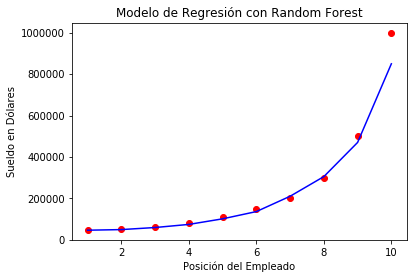

In [20]:
x_grid = np.arange(min(x),max(x),0.1)
x_grid = x_grid.reshape(len(x_grid),1)
plt.scatter(x,y,color="red")#Datos observados
plt.plot(x,regresion.predict(x),color="blue")#Datos predichos
plt.title("Modelo de Regresión con Random Forest")
plt.xlabel("Posición del Empleado")
plt.ylabel("Sueldo en Dólares")
plt.show()

#La prediccion (funcion azul) no pasa por cada punto rojo, eso quiere decir que no es overfiting.

In [22]:
#Los bosques se usan la evaluacion de riesgo crediticio.